# Creating prediction models using logistic regression, decision trees and random forest


##### Data contains information about employees and the goal is to decide which variables affect employee satisfaction level

In [28]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [29]:
# Import data

HR_df = pd.read_csv('HR_data.csv')

HR_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Explore the data 

In [30]:
## check missing values
## No missing values

HR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [31]:
## Check statistics such as mean values of numeric columns

HR_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [32]:
## check value counts for categorical column Department

HR_df.Department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [33]:
## check value counts for categorical column salary

HR_df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [34]:
## Correlation of numerical values

HR_df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


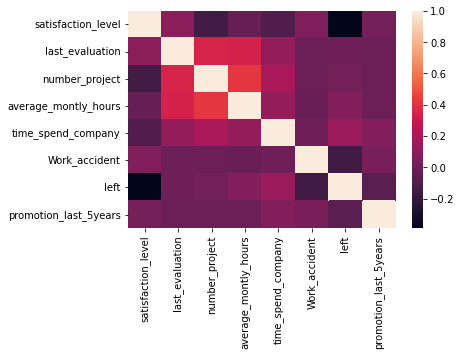

In [58]:
## visualise the correlation with heatmap

sns.heatmap(correlations)
plt.show()

In [36]:
## checking the left column and correlations

## satisfaction level negative correlation 
## time spent at company highest positive correlation 

## satisfaction_level      -0.388375
## last_evaluation          0.006567
## number_project           0.023787
## average_montly_hours     0.071287
## time_spend_company       0.144822
## Work_accident           -0.154622
## left                     1.000000
## promotion_last_5years   -0.061788

correlations = HR_df.corr()

print(correlations["left"])

satisfaction_level      -0.388375
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
Work_accident           -0.154622
left                     1.000000
promotion_last_5years   -0.061788
Name: left, dtype: float64


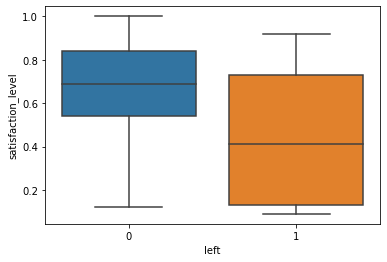

In [37]:
## boxplot vizualising satisfaction level and left

## lower satisfaction level results in more employees leaving

sns.boxplot(x = 'left', y = 'satisfaction_level', data = HR_df)

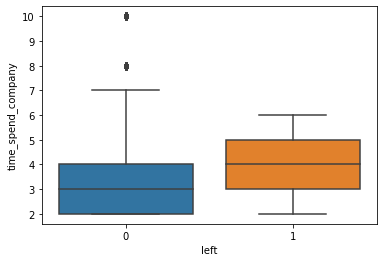

In [38]:
## boxplot showing time spent at company and left

## longer time at company means higher amount leaving

sns.boxplot(x = 'left', y = 'time_spend_company', data = HR_df)

In [39]:
## transform categorical columns to numeric

cat_list = ['Department', 'salary']

for var in cat_list:
    dummies_set = pd.get_dummies(HR_df[var], drop_first=True, prefix = var)
    HR_df = pd.concat([HR_df, dummies_set], axis = 1).drop(var, axis = 1)
    
HR_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


### Prediction models

In [60]:
## creating the test and training set

col_list = list(HR_df.columns)
col_list.remove('left')
X = HR_df[col_list]
y = HR_df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Logistic model

In [41]:
# Train and evaluate logistic regression model (to get a sense of how good the other models will perform)

# Result:
# 78 % accuracy, many yes classes incorrectly classified

# [[2639  214]
# [ 600  297]]

HR_logistic = LogisticRegression(max_iter = 500)
HR_logistic.fit(X_train,y_train)
pred_logistic = HR_logistic.predict(X_test)

# The results
print(confusion_matrix(y_test,pred_logistic))
print(classification_report(y_test,pred_logistic))

[[2639  214]
 [ 600  297]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.87      2853
           1       0.58      0.33      0.42       897

    accuracy                           0.78      3750
   macro avg       0.70      0.63      0.64      3750
weighted avg       0.76      0.78      0.76      3750



#### Decision tree

In [42]:
# Decision trees

# import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.ensemble import BaggingClassifier

In [43]:
# Create the model decision tree

# Results show 0.97 accuracy
# However, many yes classes wrong

#[[2788   65]
# [  34  863]]

HR_tree = DecisionTreeClassifier(random_state = 42)
tree_model = HR_tree.fit(X_train,y_train)
pred_tree = tree_model.predict(X_test)

print(confusion_matrix(y_test,pred_tree))

print(classification_report(y_test,pred_tree))

[[2788   65]
 [  34  863]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2853
           1       0.93      0.96      0.95       897

    accuracy                           0.97      3750
   macro avg       0.96      0.97      0.96      3750
weighted avg       0.97      0.97      0.97      3750



In [44]:
# Import Grid search
from sklearn.model_selection import GridSearchCV

In [45]:
# parameter optimization

# Best result is 0.9834256754528509 using {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10}


# optimality criterion
criterion = ['gini', 'entropy']

# Maximum depth of the tree
max_depth = [6,8,10,12]

# Class weights
weights = ['balanced', {'no':0.1, 'yes':0.9}]

# Define the grid
grid = dict(criterion = criterion, max_depth = max_depth, class_weight = weights)

# Specify  grid search
grid_search = GridSearchCV(estimator=HR_tree, param_grid=grid, scoring='roc_auc')
grid_result = grid_search.fit(X, y)

# Print the result
print("Best result is", grid_result.best_score_, 'using', grid_result.best_params_)

Best result is 0.9834256754528509 using {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10}


In [46]:
# Use parameters to optimize decision tree model

# Results is also 0.97 accuracy

# Some improvement for the yes class
# [[2797   56]
# [  48  849]]


HR_tree = DecisionTreeClassifier(class_weight = 'balanced', criterion= 'entropy', max_depth= 10, random_state = 42)
tree_model = HR_tree.fit(X_train,y_train)
pred_tree = tree_model.predict(X_test)
print(confusion_matrix(y_test,pred_tree))

# As we can see we have improve the result for the 'yes' class a lot, and we are not much worse for 'no'
print(classification_report(y_test,pred_tree))

[[2797   56]
 [  48  849]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2853
           1       0.94      0.95      0.94       897

    accuracy                           0.97      3750
   macro avg       0.96      0.96      0.96      3750
weighted avg       0.97      0.97      0.97      3750



In [47]:
# Bagging with optimized parameters

# 98 % accuracy and 50 yes class correctly predicted

#[[2838   15]
# [  50  847]]


# Use parameters from the optimization process

HR_bag = DecisionTreeClassifier(class_weight = 'balanced', criterion= 'entropy', max_depth= 10, random_state = 42)

bag_HR = BaggingClassifier(base_estimator = HR_bag, n_estimators = 200)

bag_HR.fit(X_train, y_train)

pred_bag = bag_HR.predict(X_test)


# print the results
print(confusion_matrix(y_test, pred_bag))

print(classification_report(y_test, pred_bag))

[[2838   15]
 [  51  846]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2853
           1       0.98      0.94      0.96       897

    accuracy                           0.98      3750
   macro avg       0.98      0.97      0.98      3750
weighted avg       0.98      0.98      0.98      3750



#### Random forest

In [48]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [49]:
# Random forests with optimzation 

# Accuracy is 98 % and the best results of all of the models.
# [[2839   14]
# [  68  829]]

forest_HR = RandomForestClassifier(n_estimators=100, class_weight = 'balanced', criterion= 'entropy', max_depth= 10, 
                                       random_state = 42)

# Fit the training data
forest_HR.fit(X_train, y_train)
pred_forest = forest_HR.predict(X_test)

# The results
print(confusion_matrix(y_test, pred_forest))

print(classification_report(y_test, pred_forest))

[[2839   14]
 [  68  829]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2853
           1       0.98      0.92      0.95       897

    accuracy                           0.98      3750
   macro avg       0.98      0.96      0.97      3750
weighted avg       0.98      0.98      0.98      3750



In [50]:
## the three most important predictors in the forest tree model

## satisfaction_level = 0.297425
## time_spend_company = 0.234745
## number_project = 0.159275

pd.Series(data = forest_HR.feature_importances_, index= X_train.columns)

satisfaction_level        0.297425
last_evaluation           0.126470
number_project            0.159275
average_montly_hours      0.140621
time_spend_company        0.234745
Work_accident             0.011152
promotion_last_5years     0.002268
Department_RandD          0.001604
Department_accounting     0.001033
Department_hr             0.001990
Department_management     0.001407
Department_marketing      0.000767
Department_product_mng    0.001107
Department_sales          0.003704
Department_support        0.001791
Department_technical      0.004213
salary_low                0.006777
salary_medium             0.003650
dtype: float64

In [51]:
# set the training and test set again with the new variables
# Only create new X since y = left again

X2 = HR_df[['satisfaction_level', 'time_spend_company', 'number_project']]


X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.25, random_state=42)

In [52]:
# The model with new predictors

# 97 % accuracy, did not improve yes classes 

#[[2797   56]
# [  60  837]]

forest_HR2 = RandomForestClassifier(n_estimators=100, random_state = 0)

forest_HR2.fit(X2_train, y_train)

pred_forest2 = forest_HR2.predict(X2_test)

# The results

print(confusion_matrix(y_test, pred_forest2))
print(classification_report(y_test, pred_forest2))

[[2797   56]
 [  60  837]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2853
           1       0.94      0.93      0.94       897

    accuracy                           0.97      3750
   macro avg       0.96      0.96      0.96      3750
weighted avg       0.97      0.97      0.97      3750



In [53]:
# Optimizing the new forest model

# Best result is 0.9887199530789642 using {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 12}

criterion = ['gini', 'entropy']

# Maximum depth of the tree
max_depth = [6, 8, 10,12]

# Class weights
weights = ['balanced', {'no':0.1, 'yes':0.9}]

# the grid
grid = dict(criterion = criterion, max_depth = max_depth, class_weight = weights)

forest_HR2 = RandomForestClassifier(random_state = 42)

grid_search = GridSearchCV(estimator=forest_HR2, param_grid=grid, scoring='roc_auc')

grid_result = grid_search.fit(X2, y)

# Print out the best result
print("Best result is", grid_result.best_score_, 'using', grid_result.best_params_)

Best result is 0.9887199530789642 using {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 12}


In [54]:
# Check results with optimal parameters from the earlier parameters


# 97 % accuracy, but actually not better results. 

# [[2791   62]
# [  54  843]]

# optimizing the model does not necessary get the best results this time
# the first random forest model with all columns got the best result

forest_HR2 = RandomForestClassifier(n_estimators=100, class_weight = 'balanced', criterion= 'entropy', max_depth= 12, 
                                       random_state = 0)

forest_HR2.fit(X2_train, y_train)

pred_forest2 = forest_HR2.predict(X2_test)
print(confusion_matrix(y_test, pred_forest2))

# The results

print(classification_report(y_test, pred_forest2))

[[2791   62]
 [  54  843]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2853
           1       0.93      0.94      0.94       897

    accuracy                           0.97      3750
   macro avg       0.96      0.96      0.96      3750
weighted avg       0.97      0.97      0.97      3750

